Importing modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Reading the csv file

In [2]:
data = pd.read_csv("Advertising.csv")

Segmenting our data to derive the features and the label

In [3]:
X = pd.DataFrame({'TV' : data['TV'], 'TV^2' : data['TV']**2, 'Radio' : data['Radio'], 'Radio^2' : data['Radio']**2})
Y = pd.DataFrame({'Sales' : data['Sales']})

Splitting our data into training and testing subsets

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

Initializing the linear regression model

In [5]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None)

Training the model

In [6]:
model.fit(X_train, Y_train)

LinearRegression()

Printing coefficients used

In [7]:
for i in model.coef_[0]:
    print(i, end=' ')

print(model.intercept_[0])

0.07415375751094572 -0.00010166225786397467 0.1499081024769239 0.0010998751332807772 1.7280152182999977


Forming the model predictions

In [8]:
test_predictions = model.predict(X_test)
train_predictions = model.predict(X_train)

Plotting and comparing the results

Text(0, 0.5, 'Sales')

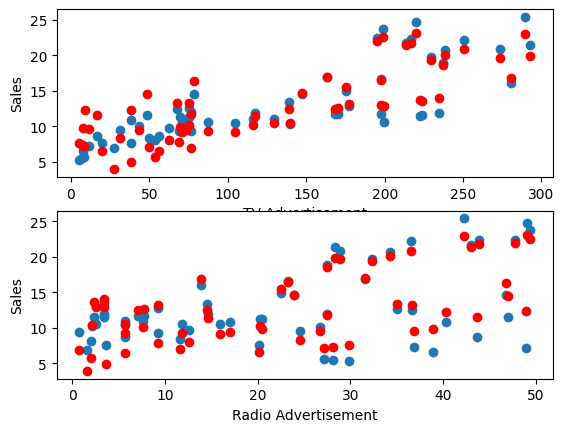

In [9]:
plt.subplot(211)
plt.scatter(X_test['TV'],Y_test)
plt.scatter(X_test['TV'],test_predictions,color='red')
plt.xlabel('TV Advertisement')
plt.ylabel('Sales')
plt.subplot(212)
plt.scatter(X_test['Radio'],Y_test)
plt.scatter(X_test['Radio'],test_predictions,color='red')
plt.xlabel('Radio Advertisement')
plt.ylabel('Sales')

Plotting both the features together

Text(0.5, 0, 'Total Sales')

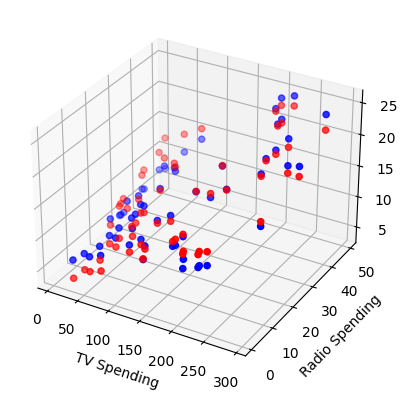

In [10]:
ax = plt.axes(projection="3d")
ax.scatter3D(X_test['TV'],X_test['Radio'],test_predictions,color='red')
ax.scatter3D(X_test['TV'],X_test['Radio'],Y_test, color='blue')
ax.set_xlabel('TV Spending')
ax.set_ylabel('Radio Spending')
ax.set_zlabel('Total Sales')


Obtaining residuals with respect to individual predictions

In [11]:
test_res = abs(test_predictions - Y_test)
train_res = abs(train_predictions - Y_train)

Plotting the residuals

Text(0, 0.5, 'Difference')

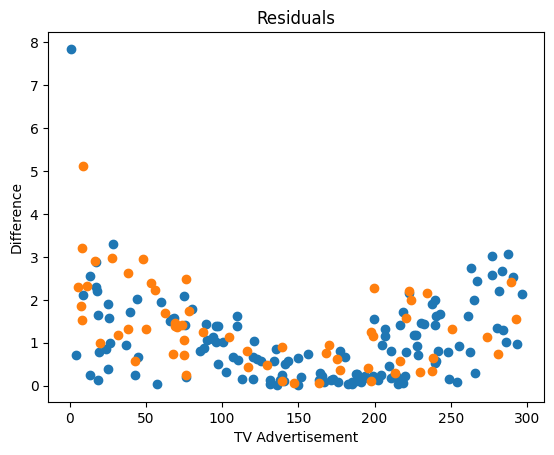

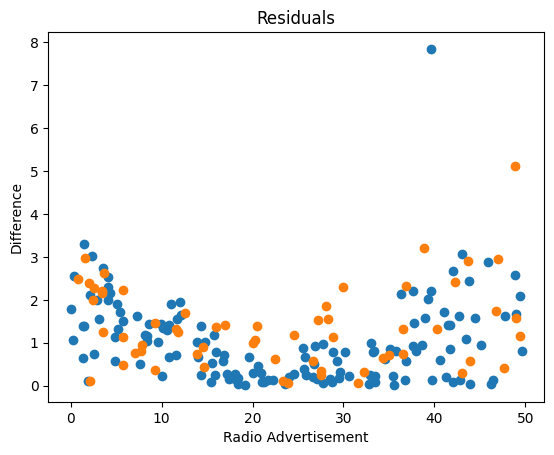

In [12]:
plt.scatter(X_train['TV'],train_res)
plt.scatter(X_test['TV'],test_res)
plt.title('Residuals')
plt.xlabel('TV Advertisement')
plt.ylabel('Difference')
plt.figure()
plt.scatter(X_train['Radio'],train_res)
plt.scatter(X_test['Radio'],test_res)
plt.title('Residuals')
plt.xlabel('Radio Advertisement')
plt.ylabel('Difference')

Obtaining the mean squared error for both training and testing datasets

In [13]:
from sklearn.metrics import mean_squared_error

MSE_Test = mean_squared_error(Y_test, test_predictions)
MSE_Train = mean_squared_error(Y_train, train_predictions)
print(MSE_Train,MSE_Test)

2.047238520923384 2.8121619752644507
